In [1]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

importar el dataset

In [2]:
#Convertimos el dataset en dataframe
df= pd.read_csv("barcelona50new.csv")
df

,Unnamed: 0,last_scraped,host_id,host_since,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,2025-06-21,71615,2010-01-19,Mireia Maria,within an hour,96%,91%,f,44.0,...,4.62,4.60,4.81,4.28,HUTB-002062,t,28,28,0,0
1,1,2025-06-23,90417,2010-03-09,Etain (Marnie),within an hour,100%,96%,t,6.0,...,4.94,4.99,4.65,4.68,HUTB005057,f,1,1,0,0
2,2,2025-06-22,135703,2010-05-31,Nick,within an hour,100%,100%,f,3.0,...,4.88,4.89,4.89,4.47,HUTB-001722,f,3,3,0,0
3,3,2025-06-22,73163,2010-01-24,Andres,within an hour,80%,94%,f,5.0,...,4.68,4.68,4.73,4.23,Exempt,f,3,3,0,0
4,4,2025-06-22,1447144,2011-11-27,Acomodis Apartments,within an hour,87%,28%,f,356.0,...,2.67,3.67,5.00,4.00,HUTB-076700,f,355,355,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18922,18922,2025-06-26,4459553,2012-12-21,AB Apartment Barcelona,within an hour,100%,79%,f,224.0,...,NaN,NaN,NaN,NaN,HUTB-011537,f,205,205,0,0
18923,18923,2025-06-21,4459553,2012-12-21,AB Apartment Barcelona,within an hour,100%,79%,f,224.0,...,NaN,NaN,NaN,NaN,HUTB-012714,f,205,205,0,0
18924,18924,2025-06-21,4459553,2012-12-21,AB Apartment Barcelona,within an hour,100%,79%,f,224.0,...,NaN,NaN,NaN,NaN,HUTB-011546,f,205,205,0,0
18925,18925,2025-06-23,4459553,2012-12-21,AB Apartment Barcelona,within an hour,100%,79%,f,224.0,...,NaN,NaN,NaN,NaN,HUTB-007530,f,205,205,0,0


In [3]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18927 entries, 0 to 18926
Data columns (total 52 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    18927 non-null  int64  
 1   last_scraped                                  18927 non-null  object 
 2   host_id                                       18927 non-null  int64  
 3   host_since                                    18924 non-null  object 
 4   host_name                                     18924 non-null  object 
 5   host_response_time                            16037 non-null  object 
 6   host_response_rate                            16037 non-null  object 
 7   host_acceptance_rate                          16183 non-null  object 
 8   host_is_superhost                             18360 non-null  object 
 9   host_listings_count                           18924 non-null 

Esto es para cargar las librerias y ver con que datos contamos 

In [4]:
df.isnull().sum()

Unnamed: 0                                         0
last_scraped                                       0
host_id                                            0
host_since                                         3
host_name                                          3
host_response_time                              2890
host_response_rate                              2890
host_acceptance_rate                            2744
host_is_superhost                                567
host_listings_count                                3
host_identity_verified                             3
neighbourhood                                   9773
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                     

In [5]:
dflimpio = df.dropna()

In [6]:
dflimpio.isnull().sum()

Unnamed: 0                                      0
last_scraped                                    0
host_id                                         0
host_since                                      0
host_name                                       0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0


Eliminamos los nulos para un analisis limpio

review score accurancy y number of reviews

In [9]:
# Seleccionamos dos columnas numéricas para clustering
X = dflimpio[['review_scores_accuracy', 'number_of_reviews']].values
X

array([[  4.36,  48.  ],
       [  4.94,  88.  ],
       [  4.44, 147.  ],
       ...,
       [  5.  ,   1.  ],
       [  5.  ,   1.  ],
       [  5.  ,   3.  ]])

In [10]:
# Escalamos o Normalizamos los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
#Aplicamos K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans

KMeans(n_clusters=3, random_state=42)

In [12]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([2, 0, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[ 0.19947796, -0.3194962 ],
       [ 0.35319013,  1.79249861],
       [-2.20278112, -0.630418  ]])

In [15]:
# Agregamos la columna cluster_2D con las etiquetas obtenidas en una posición específica
dflimpio.insert(loc=8, column='cluster_2D', value=etiquetas)
dflimpio

,Unnamed: 0,last_scraped,host_id,host_since,host_name,host_response_time,host_response_rate,host_acceptance_rate,cluster_2D,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,0,2025-06-21,71615,2010-01-19,Mireia Maria,within an hour,96%,91%,2,f,...,4.62,4.60,4.81,4.28,HUTB-002062,t,28,28,0,0
1,1,2025-06-23,90417,2010-03-09,Etain (Marnie),within an hour,100%,96%,0,t,...,4.94,4.99,4.65,4.68,HUTB005057,f,1,1,0,0
2,2,2025-06-22,135703,2010-05-31,Nick,within an hour,100%,100%,0,f,...,4.88,4.89,4.89,4.47,HUTB-001722,f,3,3,0,0
5,5,2025-06-24,1435464,2011-11-23,Jaume,within an hour,97%,99%,0,t,...,4.77,4.74,4.77,4.41,HUTB-009578,t,15,15,0,0
6,6,2025-06-24,1786501,2012-02-21,Fidel,within an hour,100%,99%,1,t,...,4.77,4.78,4.75,4.58,ESFCTU000008067000117406000000000000000000HUTB...,t,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18642,18642,2025-06-24,689584795,2025-04-12,Zuleima Liliana,within a day,52%,77%,0,f,...,5.00,4.00,5.00,5.00,Exempt,f,1,0,1,0
18663,18663,2025-06-21,231456318,2018-12-19,The Streets Apartments,within an hour,98%,100%,0,f,...,5.00,5.00,5.00,5.00,HUTB-077662,t,8,8,0,0
18717,18717,2025-06-22,690196749,2025-04-15,Anh,within an hour,100%,100%,0,f,...,5.00,5.00,5.00,5.00,HUTB-000293,f,1,1,0,0
18791,18791,2025-06-25,148187952,2017-08-29,Virginie,a few days or more,20%,33%,0,f,...,5.00,5.00,5.00,5.00,Exempt,f,1,0,1,0


In [16]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

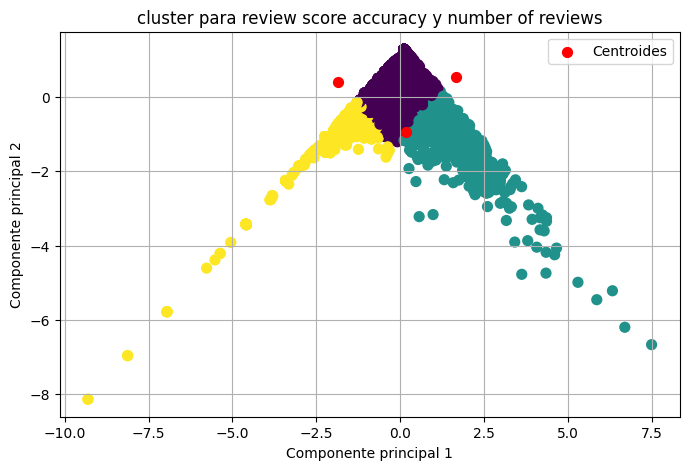

In [18]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')

plt.title("cluster para review score accuracy y number of reviews")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()